In [1]:
from sqlalchemy import create_engine

ADDR="localhost"
PORT=5432
USERNAME="postgres"
PASSWORD="postgres"
DBNAME="postgres"

ALGORITHM_PREFIX_NAME="fcm"
POINT_TABLE=f"{ALGORITHM_PREFIX_NAME}_points"
CLUSTER_TABLE=f"{ALGORITHM_PREFIX_NAME}_clusters"
PREDICTION_TABLE=f"{ALGORITHM_PREFIX_NAME}_predict"

engine = create_engine(f"postgresql://{USERNAME}:{PASSWORD}@{ADDR}:{PORT}/{DBNAME}")

In [2]:
## Read data

import pandas as pd
import numpy as np


df_origin = pd.read_sql_query(f"SELECT * FROM {POINT_TABLE}", engine)
df_cluster_origin = pd.read_sql_query(f"SELECT * FROM {CLUSTER_TABLE}", engine)
df_predict_origin = pd.read_sql_query(f"SELECT * FROM {PREDICTION_TABLE}", engine)

df = df_origin.copy()
df_cluster = df_cluster_origin.copy()
df_predict = df_predict_origin.copy()




In [3]:
dates = df["timestamp"]
nm_df = np.stack(df["vector"])


dates_cluster = df["timestamp"]
nm_df_cluster = np.stack(df_cluster["vector"])




In [4]:
## Transform to 2-D with PCA

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale out data to normalize them
scaler =  StandardScaler()
x =scaler.fit_transform(nm_df)
x_cluster = scaler.fit_transform(nm_df_cluster)

In [5]:
# 2-D layout

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)
principalComponents_cluster = pca.fit_transform(x_cluster)

principalDF = pd.DataFrame(data = principalComponents, columns=["x", "y"])
principalDF_cluster = pd.DataFrame(data = principalComponents_cluster, columns=["x", "y"])



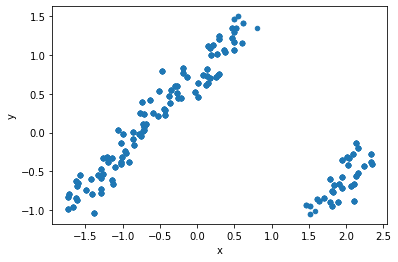

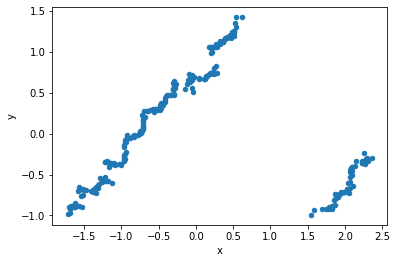

In [6]:
## Plot data

principalDF.plot.scatter("x","y")
principalDF_cluster.plot.scatter("x","y")






In [7]:

df_predict


,timestamp,point,labels,membership
0,2020-06-20T15:56:25.033,"[-0.6399675549897559, 21.399772031347336]","[0, 1]","[0.9846117170326498, 0.015388282967350085]"
1,2020-06-20T15:56:25.034,"[6.980725962622961, 19.824498172786374]","[0, 1]","[0.0001669174673078809, 0.9998330825326923]"
2,2020-06-20T15:56:25.034,"[7.58263827605494, 21.278918821284172]","[0, 1]","[0.0011544311127733478, 0.9988455688872268]"
3,2020-06-20T15:56:25.037,"[1.5805295893540423, 18.942874275052127]","[0, 1]","[0.9996285720506897, 0.00037142794931027575]"
4,2020-06-20T15:56:25.035,"[9.387218749530083, 20.63913694166832]","[0, 1]","[0.004383286863657165, 0.9956167131363429]"
...,...,...,...,...
1225,2020-06-20T15:57:36.639,"[25.702320989925617, 40.72786763310632]","[0, 1]","[0.9999950324684541, 4.96753154601811e-06]"
1226,2020-06-20T15:57:36.640,"[23.67499823570182, 41.35962767191375]","[0, 1]","[0.9964420564628125, 0.003557943537187625]"
1227,2020-06-20T15:57:36.640,"[33.043834363516325, 39.06605502861627]","[0, 1]","[3.473814256074853e-05, 0.9999652618574391]"
1228,2020-06-20T15:57:36.641,"[28.553808797061205, 39.79133437382992]","[0, 1]","[0.8066849851021882, 0.1933150148978118]"
